In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file

df = pd.read_csv(r"C:\Users\OJO MOSES\Desktop\INT\Insurance Policies.csv")

In [3]:
df.head(5)

,ID,birthdate,marital_status,car_use,gender,kids_driving,parent,education,car_make,car_model,car_color,car_year,claim_freq,coverage_zone,claim_amt,household_income
0,62-2999778,8/9/1962,Single,Private,Male,2,Yes,High School,Acura,TSX,Green,2010,1,Highly Urban,$73759.88,$220436.66
1,70-2426103,4/21/1988,Married,Private,Female,0,No,Bachelors,Corbin,Sparrow,Turquoise,2004,1,Urban,$78975.41,$66491.43
2,08-3808219,3/8/1999,Divorced,Private,Male,0,No,Bachelors,Nissan,Pathfinder,Orange,1993,0,Rural,$30904.01,$56122.70
3,38-0306843,5/10/1959,Single,Private,Female,0,No,Bachelors,Ford,Econoline E350,Pink,2000,1,Highly Urban,$30257.82,$175182.61
4,47-5163637,1/15/1992,Single,Commercial,Male,0,No,Masters,Nissan,350Z,Green,2006,3,Rural,$50434.02,$137110.23


In [4]:
#Checking the data size using the .shape function\

df.shape

(37542, 16)

In [5]:
#Checking for duplicate

df.duplicated().sum()

0

In [6]:
#Checking for null value

df.isnull().sum()

ID                  0
birthdate           0
marital_status      0
car_use             0
gender              0
kids_driving        0
parent              0
education           0
car_make            0
car_model           0
car_color           0
car_year            0
claim_freq          0
coverage_zone       0
claim_amt           0
household_income    0
dtype: int64

In [7]:
#Checking the data type

df.dtypes

ID                  object
birthdate           object
marital_status      object
car_use             object
gender              object
kids_driving         int64
parent              object
education           object
car_make            object
car_model           object
car_color           object
car_year             int64
claim_freq           int64
coverage_zone       object
claim_amt           object
household_income    object
dtype: object

In [8]:
# Extracting the birth year from the birthdate, and calculating and create a column for policy holder"s age.

df["birth year"] = df["birthdate"].astype(str).str[-4:]
df["birth year"] = pd.to_numeric(df["birth year"],errors="coerce")
df["age"] = 2023 - df["birth year"]

In [9]:
# Creating a column for age range, showing the young, matured and adult categories.

def get_age_range(age):
    if age < 40:
        return "Young"
    elif age>= 41 and age <61:
        return "Matured"
    else:
        return "Adult"
df["age_range"] = df["age"].apply(get_age_range)

In [10]:
# Changing the claim amount's datatype to float

df["claim_amt"] = df["claim_amt"].str.strip("$")
df['claim_amt'] = df['claim_amt'].astype(float)

In [11]:
# Changing the house income's datatype to float

df["household_income"] = df["household_income"].str.strip("$")
df['household_income'] = df['household_income'].astype(float)


In [12]:
# Dropping Columns that  are not needed.

df = df.drop(columns = "ID")
df = df.drop(columns = "birthdate")
df = df.drop(columns = "birth year")
df = df.drop(columns = "age")

In [13]:
#Checking the data type

df.dtypes

marital_status       object
car_use              object
gender               object
kids_driving          int64
parent               object
education            object
car_make             object
car_model            object
car_color            object
car_year              int64
claim_freq            int64
coverage_zone        object
claim_amt           float64
household_income    float64
age_range            object
dtype: object

In [14]:
#Checking the descriptive analysis of the dataset

df.describe().round(3)

,kids_driving,car_year,claim_freq,claim_amt,household_income
count,37542.000,37542.000,37542.000,37542.000,37542.000
mean,0.418,2000.293,0.510,50028.514,147247.408
std,0.737,9.045,1.015,28706.518,59145.589
min,0.000,1909.000,0.000,0.040,45004.910
25%,0.000,1995.000,0.000,25439.407,96162.182
50%,0.000,2002.000,0.000,49455.890,146674.895
75%,1.000,2007.000,1.000,74974.928,198277.420
max,3.000,2013.000,4.000,99997.700,249991.110


In [15]:
# Calculating average claim frequencies for different demographic groups(age, gender, marital status)

Average_claims_frequencies = df.groupby(["age_range","gender","marital_status"])["claim_freq"].mean().reset_index().round(3)
Average_claims_frequencies.sort_values(by="claim_freq",ascending = False, inplace=True)
Average_claims_frequencies

,age_range,gender,marital_status,claim_freq
18,Young,Female,Seperated,0.625
22,Young,Male,Seperated,0.551
6,Adult,Male,Seperated,0.545
21,Young,Male,Married,0.543
0,Adult,Female,Divorced,0.539
11,Matured,Female,Single,0.537
4,Adult,Male,Divorced,0.534
9,Matured,Female,Married,0.532
13,Matured,Male,Married,0.524
3,Adult,Female,Single,0.520


In [16]:
# Calculating average claim frequencies for age range

Average_claims_frequencies_for_age_range = df.groupby("age_range")["claim_freq"].mean().reset_index().round(3)
Average_claims_frequencies_for_age_range.sort_values(by="claim_freq",ascending = False, inplace=True)
Average_claims_frequencies_for_age_range

,age_range,claim_freq
2,Young,0.513
0,Adult,0.510
1,Matured,0.508


In [17]:
# Calculating average claim frequencies for gender

Average_claims_frequencies_gender = df.groupby("gender")["claim_freq"].mean().reset_index().round(3)
Average_claims_frequencies_gender.sort_values(by="claim_freq",ascending = False, inplace=True)
Average_claims_frequencies_gender

,gender,claim_freq
0,Female,0.514
1,Male,0.506


In [18]:
# Calculating average claim frequencies for marital status

Average_claims_frequencies_marital_status = df.groupby("marital_status")["claim_freq"].mean().reset_index().round(3)
Average_claims_frequencies_marital_status.sort_values(by="claim_freq",ascending = False, inplace=True)
Average_claims_frequencies_marital_status

,marital_status,claim_freq
2,Seperated,0.534
1,Married,0.520
3,Single,0.505
0,Divorced,0.492


In [19]:
# Calculating average claim amount for different demographic groups(age, gender, marital status)


Average_claims_amount = df.groupby(["age_range","gender","marital_status"])["claim_amt"].mean().reset_index().round(3)
Average_claims_amount.sort_values(by="claim_amt",ascending = False, inplace=True)
Average_claims_amount

,age_range,gender,marital_status,claim_amt
12,Matured,Male,Divorced,51320.072
1,Adult,Female,Married,51045.487
13,Matured,Male,Married,50821.935
9,Matured,Female,Married,50601.107
10,Matured,Female,Seperated,50557.186
8,Matured,Female,Divorced,50543.373
7,Adult,Male,Single,50440.457
20,Young,Male,Divorced,50334.841
19,Young,Female,Single,50292.705
23,Young,Male,Single,50243.900


In [20]:
# Calculating average claim amount for age range


Average_claims_amount_age_range = df.groupby("age_range")["claim_amt"].mean().reset_index().round(3)
Average_claims_amount_age_range.sort_values(by="claim_amt",ascending = False, inplace=True)
Average_claims_amount_age_range

,age_range,claim_amt
1,Matured,50187.542
2,Young,49947.821
0,Adult,49911.193


In [21]:
# Calculating average claim amount for gender


Average_claims_amount_gender = df.groupby("gender")["claim_amt"].mean().reset_index().round(3)
Average_claims_amount_gender.sort_values(by="claim_amt",ascending = False, inplace=True)
Average_claims_amount_gender

,gender,claim_amt
1,Male,50197.599
0,Female,49860.058


In [22]:
# Calculating average claim amount for marital status


Average_claims_amount = df.groupby("marital_status")["claim_amt"].mean().reset_index().round(3)
Average_claims_amount.sort_values(by="claim_amt",ascending = False, inplace=True)
Average_claims_amount

,marital_status,claim_amt
1,Married,50337.819
0,Divorced,50089.164
3,Single,49906.323
2,Seperated,49259.423


In [23]:
# Calculating vehicles' frequencies claim

vehicle_frequencies_claim = df.groupby("car_make")["claim_freq"].sum().reset_index().round(3)
vehicle_frequencies_claim.sort_values(by="claim_freq",ascending = False, inplace=True)
vehicle_frequencies_claim

,car_make,claim_freq
24,Ford,1694
11,Chevrolet,1457
17,Dodge,933
75,Toyota,861
25,GMC,854
...,...,...
62,Rambler,1
2,Aptera,1
19,Fairthorpe,0
27,Hillman,0


In [24]:
# Calculating vehicles' amount claim

vehicle_amount_claim = df.groupby("car_make")["claim_amt"].sum().reset_index().round(3)
vehicle_amount_claim.sort_values(by="claim_amt",ascending = False, inplace=True)
vehicle_amount_claim

,car_make,claim_amt
24,Ford,1.655833e+08
11,Chevrolet,1.478564e+08
17,Dodge,9.291236e+07
75,Toyota,9.016172e+07
25,GMC,8.739633e+07
...,...,...
51,Merkur,2.217741e+05
22,Fillmore,2.014230e+05
19,Fairthorpe,1.151804e+05
63,Renault,9.835543e+04


In [25]:
# calculating the frequencies claim for different educational levels

educational_level_frequencies_claim = df.groupby("education")["claim_freq"].sum().reset_index().round(3)
educational_level_frequencies_claim.sort_values(by="claim_freq",ascending = False, inplace=True)
educational_level_frequencies_claim

,education,claim_freq
0,Bachelors,9500
1,High School,5374
2,Masters,2902
3,PhD,1382


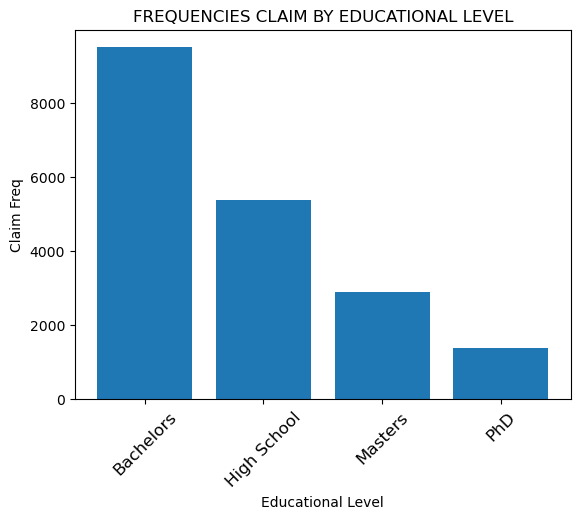

In [26]:
plt.bar(educational_level_frequencies_claim["education"], educational_level_frequencies_claim["claim_freq"])
plt.xlabel('Educational Level')
plt.ylabel('Claim Freq')
plt.title('FREQUENCIES CLAIM BY EDUCATIONAL LEVEL')
plt.xticks(rotation=45, fontsize=12)
plt.show()

In [27]:
# calculating the education level of different policy holders

educational_level = df['education'].value_counts()
educational_level

education
Bachelors      18701
High School    10439
Masters         5640
PhD             2762
Name: count, dtype: int64

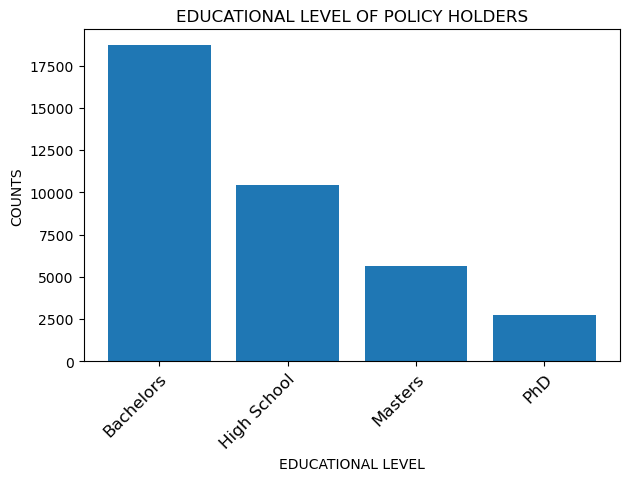

In [28]:
plt.bar(educational_level.index,educational_level.values)
plt.xlabel('EDUCATIONAL LEVEL')
plt.ylabel('COUNTS')
plt.title('EDUCATIONAL LEVEL OF POLICY HOLDERS')
# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=12, wrap=True)
plt.tight_layout()
plt.show()

In [29]:
# calculating the coverage zone of different policy holders

coverage_zone = df['coverage_zone'].value_counts()
coverage_zone

coverage_zone
Urban           7588
Rural           7522
Highly Urban    7514
Suburban        7466
Highly Rural    7452
Name: count, dtype: int64

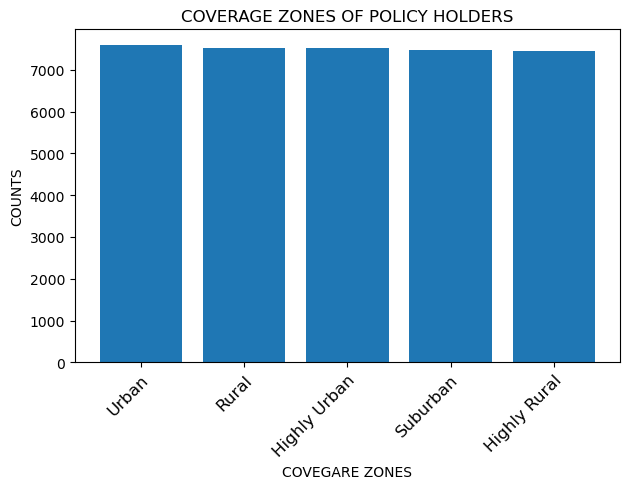

In [30]:
plt.bar(coverage_zone.index,coverage_zone.values)
plt.xlabel('COVEGARE ZONES')
plt.ylabel('COUNTS')
plt.title('COVERAGE ZONES OF POLICY HOLDERS')
# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=12, wrap=True)
plt.tight_layout()
plt.show()

In [36]:
# Calculating parents' frequencies claim

parents_frequencies_claim = df.groupby("parent")[["claim_amt","claim_freq"]].sum().reset_index().round(3)
parents_frequencies_claim.sort_values(by="claim_freq",ascending = False, inplace=True)
parents_frequencies_claim

,parent,claim_amt,claim_freq
0,No,1.048377e+09,10676
1,Yes,8.297933e+08,8482


In [31]:
# Calculating claim frequencies and amounts vary across different coverage zones

coverage_zones_performance = df.groupby("coverage_zone")[["claim_amt","claim_freq"]].sum().reset_index().round(3)
coverage_zones_performance.sort_values(by="claim_amt",ascending = False, inplace=True)
coverage_zones_performance

,coverage_zone,claim_amt,claim_freq
4,Urban,3.822662e+08,3856
1,Highly Urban,3.746558e+08,3881
2,Rural,3.744303e+08,3809
3,Suburban,3.742321e+08,3883
0,Highly Rural,3.725861e+08,3729


In [32]:
# Calculating car ownership among different demographic groups?

car_ownership = df.groupby("coverage_zone")['car_use'].value_counts()
car_ownership

coverage_zone  car_use   
Highly Rural   Private       5990
               Commercial    1462
Highly Urban   Private       5987
               Commercial    1527
Rural          Private       6057
               Commercial    1465
Suburban       Private       5992
               Commercial    1474
Urban          Private       6034
               Commercial    1554
Name: count, dtype: int64

In [33]:
# Checking if there is correlation between household income and claim amount

corr_matrix = df[["claim_amt","household_income"]].corr(method ='pearson')
corr_matrix

,claim_amt,household_income
claim_amt,1.000000,-0.004689
household_income,-0.004689,1.000000


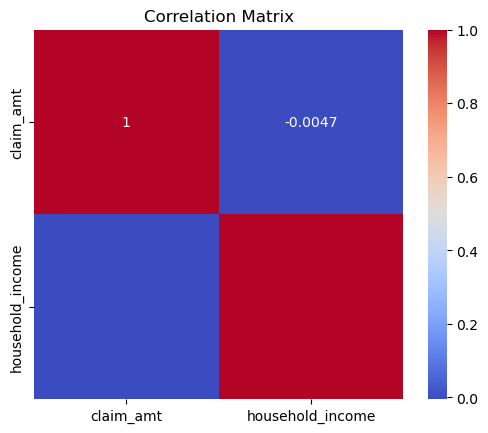

In [34]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()